In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.preprocessing import LabelEncoder
# from sklearn.impute import KNNImputer

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# !pip install tqdm

# from tqdm import trange, notebook     

In [ ]:
# pd.options.display.max_rows = 999999
# pd.options.display.max_columns = 500

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

In [2]:
train_t = pd.read_csv('train_transaction.csv')
train_i = pd.read_csv('train_identity.csv')
test_t = pd.read_csv('test_transaction.csv')
test_i = pd.read_csv('test_identity.csv')

submission = pd.read_csv('sample_submission.csv')

# Merge

In [9]:
train = pd.merge(train_t, train_i, on='TransactionID', how='outer')
train

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
test = pd.merge(test_t, test_i, on='TransactionID', how='outer')
test

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663549,18403224,31.950,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.000,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.000,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.950,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.950,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,34214279,94.679,C,13832,375.0,185.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506687,4170236,34214287,12.173,C,3154,408.0,185.0,mastercard,224.0,debit,...,chrome 43.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,ALE-L23 Build/HuaweiALE-L23
506688,4170237,34214326,49.000,W,16661,490.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506689,4170238,34214337,202.000,W,16621,516.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
'''
def reduce_mem_usage1(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",props[col].dtype)
            print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

%time
# From kernel https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
# WARNING! THIS CAN DAMAGE THE DATA 
def reduce_mem_usage2(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df
'''

In [ ]:
'''
train = reduce_mem_usage2(train)
test = reduce_mem_usage2(test)
'''

# Train Data

In [ ]:
train.info()
train.iloc[:, :100].info()
train.iloc[:, 100:200].info()
train.iloc[:, 200:300].info()
train.iloc[:, 300:400].info()
train.iloc[:, 300:400].info()

dtype = float64, int64, object

## Numerical Column (Discrete? Continuous?)

Discrete = ['TransactionID', 'isFraud', 'TransactionDT', 'card1', 
</br>'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1',
       'dist2',  'C3',  'C5',  'C7', 'C8', 'C9', 'C10',
       'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7',
       ,  'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3',
       'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
       'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24',
       'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34',
       'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44',
       'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54',
       'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63',
       'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73',
       'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83',
       'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93',
       'V94', 'V95',  'V97', 'V98', 'V99', 'V100', 'V101', 
       'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111',
       'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120',
       'V121', 'V122', 'V123', 'V124', 'V125',   'V138',
       'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147',
       'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156',
       'V157', 'V158',   'V167', 'V168', 'V169', 'V170', 'V171', 'V172',
       'V173', 'V174', 'V175', 'V176', 'V177',  'V179', 'V180', 'V181',
       'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190',
       'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199',
       'V200', 'V201',  'V217',
       'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226',
       'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235',
       'V236', 'V237', 'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244',
       'V245', 'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253',
       'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V260', 'V261', 'V262',
        'V269',   'V280', 'V281',
       'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290',
       'V292', 'V293',  'V295', 'V296', 'V297', 'V298', 'V299',
       'V300', 'V301', 'V302', 'V303', 'V304', 'V305',  'V322',  'V324', 'V325', 'V326',
       'V327', 'V328', 'V329', 'V330', , 'id_01', , 'id_03', 'id_04',
       'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_13',
       'id_14', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_24',
       'id_25', 'id_26', 'id_32']
</br>
</br> Continuous = ['TransactionAmt', 'D8', 'D9', 'V126', 'V127', 'V128', 'V129',
       'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V159', 'V160','V263',
       'V264', 'V265', 'V266', 'V267', 'V268', 'V306', 'V307', 'V308','V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317','V318', 'V319', 'V320', 'V321', 'id_11']

</br> 추가확인 필요       
'C1', 'C2', 'C4', 'C6', 'C11', 'V96', 'V102', 'V161','V162', 'V163',
       'V164', 'V165', 'V166','V178', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208',
       'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V279', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278', 'V291', 'V294', 'V323','V331', 'V332', 'V333', 'V334', 'V335',
       'V336', 'V337', 'V338', 'V339','id_02',


In [11]:
train_float = train.select_dtypes(include='float64')
train_int = train.select_dtypes(include='int64')  # 결측치 없음 # Discrete Column

In [12]:
train.select_dtypes('int64')

,TransactionID,isFraud,TransactionDT,card1
0,2987000,0,86400,13926
1,2987001,0,86401,2755
2,2987002,0,86469,4663
3,2987003,0,86499,18132
4,2987004,0,86506,4497
...,...,...,...,...
590535,3577535,0,15811047,6550
590536,3577536,0,15811049,10444
590537,3577537,0,15811079,12037
590538,3577538,0,15811088,7826


In [ ]:
print(train_float.columns[:100])
print(train_float.columns[100:200])
print(train_float.columns[200:300])
print(train_float.columns[300:400])

In [ ]:
# float63 type column들의 unique 뽑기  /  continous? discrete?

for i in range(399):
    print(train_float.columns[i])
    print(train_float[train_float.columns[i]].unique())

In [ ]:
for i in range(20):
    i += 1
#     print(i-1, i)
    print(train_float.iloc[:,20*(i-1):20*(i)].describe())


In [13]:
train_float_list = ['C1', 'C2', 'C4', 'C6', 'C11', 'V96', 'V102',
              'V161','V162', 'V163','V164', 'V165', 'V166','V178',
              'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208',
              'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 
              'V216', 'V279', 'V270', 'V271', 'V272', 'V273', 'V274',
              'V275', 'V276', 'V277', 'V278', 'V291', 'V294', 'V323',
              'V331', 'V332', 'V333', 'V334', 'V335','V336', 'V337',
              'V338', 'V339','id_02'] # 추가 확인할 것

In [56]:
train_float_list[0]

'C1'

In [14]:
a = len(train_float_list)

In [ ]:
np.set_printoptions(threshold=np.inf, linewidth=np.inf) # nd array 생략 없애기
np.set_printoptions(suppress=True)    # 부동소수점 제거

In [15]:
train_float_list[51]

'id_02'

In [ ]:
train.V102.nunique()

In [ ]:
(1285 / 590540)*100

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


In [ ]:
for i in range(a):
    i += 1
    print(train_float_list[i-1])   
    print(train[train_float_list[i-1]].unique())

In [17]:
subplot()
sns.distplot(train_float.C1)

NameError: name 'subplot' is not defined

In [23]:
train_float_list[0]

'C1'

<AxesSubplot:xlabel='C1', ylabel='Density'>

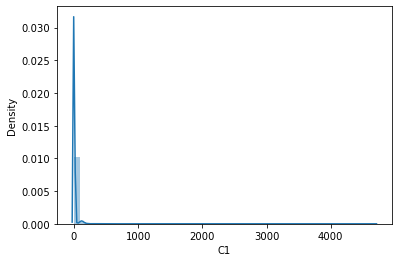

In [29]:
sns.distplot(train.C1)

In [36]:
train[train_float_list[0]]

0         1.0
1         1.0
2         1.0
3         2.0
4         1.0
         ... 
590535    2.0
590536    1.0
590537    1.0
590538    1.0
590539    2.0
Name: C1, Length: 590540, dtype: float64

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 16))

for row in range(4):
    for col in range(3):
        idx = row * 3 + col
        
        if idx < len(train_float_list):
            ax = axes[row][col]
            dept = train_float_list[idx]
            sns.distplot(train, ax=ax)
            ax.set(xlabel=dept)


ValueError: could not convert string to float: 'W'

NameError: name 'ax' is not defined

In [65]:
for i in range(6):
    i += 1
    print(i)

1
2
3
4
5
6


In [ ]:
a = len(train_float.C1.unique())
a

In [ ]:
([1.1]).is_integer()

In [ ]:
train[train_float_list[0]].iloc[:50]
# train.C1

In [ ]:
sns.histplot(train_float[train_float_list].iloc[:,:2])

In [ ]:
train_float[train_float_list].iloc[:,:2]

In [ ]:
train_float

In [ ]:
for i in range(5):
#     print(train_float.columns[i])
    print(sns.histplot(train_float[train_float_list[i]]))

In [ ]:
# plt.figure(figsize=(10,10))
# print(train_float.TransactionAmt.value_counts().sort_index())
sns.pairplot(a)

Continuous columns = 
</br>Discrete columns = ['TransactionID', 'isFraud', 'TransactionDT', 'card1']

In [ ]:
train_float.card3.value_counts()

In [ ]:
train_float.filter(like='card')

In [ ]:
train_float.card2.value_counts()

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(3,1,1)
sns.countplot(train_float.card2)

plt.subplot(3,1,2)
sns.countplot(train_float.card3)

plt.subplot(3,1,3)
sns.countplot(train_float.card5)

In [ ]:
train_float.describe()

In [ ]:
train_numerical.filter(like='card')

In [ ]:
train.select_dtypes('object')

### 정규분포

### 결측치 처리

## Categorical Column (Nominal? Ordinal?)

In [ ]:
train_object = train.select_dtypes(include='object')
train_object

Categorical Column들을 보니 순서가 없다. Nominal feature들이라고 볼 수 있겠다

In [ ]:
sns.pairplot(train_object.iloc[:,:10])

### 분포

### Label Encoding

### 결측치 처리

In [ ]:
imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(train_float)        # (np.reshape(train['card6'],(-1,1))


In [ ]:
train_float_imputed = pd.DataFrame(imputed, columns = train_float.columns)
train_float_imputed

In [ ]:
train.corr()

In [ ]:
# nan = np.nan
# X = [[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]]
# imputer = KNNImputer(n_neighbors=4, weights="uniform")
# imputer.fit_transform(X)

In [ ]:
print(train.isnull().sum()[:50])
print(train.isnull().sum()[50:100])
print(train.isnull().sum()[100:])

In [ ]:
train.select_dtypes("object").columns

In [ ]:
train_object = train.select_dtypes("object")
train_object

In [ ]:
# le = LabelEncoder()
# train['card6'] = le.fit_transform(train['card6'])
# train.card6

In [ ]:
train_object.columns

In [ ]:
imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(train_object)        # (np.reshape(train['card6'],(-1,1))
train_object_imputed = pd.DataFrame(imputed, columns = train_object.columns)
train_object_imputed

In [ ]:


X = np.array(train.card4)
imputer = KNNImputer(n_neighbors=4, weights="uniform")
imputer.fit_transform(X)

In [ ]:
train_object.card4.value_counts()

In [ ]:
(train_object['card4'] == 'visa').sum()

In [ ]:
def train_percent(a, b):
    return a / b

In [ ]:
train_percent(train_object.card4.visa / train_object.card4.count())

In [ ]:
train_object.card4.value_counts()
sns.histplot(data=train_object.card4)

In [ ]:
train_object.DeviceInfo.unique()

In [ ]:
train.card4 = le.transform

In [ ]:
train.ProductCD.unique()

In [ ]:
le.classes_

In [ ]:
le.transform(['C', 'H', 'R', 'S', 'W'])

In [ ]:
train['ProductCD'] = le.transform([train.ProductCD])
train['ProductCD']

In [ ]:
submission.shape

In [ ]:
test.ProductCD.value_counts()

In [ ]:
print(test.columns[ : 100])
print(test.columns[100 : 200])
print(test.columns[200 : 300])
print(test.columns[300 : 400])
print(test.columns[400 : 450])

In [ ]:
# 결측치 보기

test.iloc[:, :100].info()
test.iloc[:, 100:200].info()
test.iloc[:, 200:300].info()
test.iloc[:, 300:400].info()
test.iloc[:, 300:400].info()

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=train, x='ProductCD', palette='Set2')
train[['ProductCD']].value_counts() #.sort_index()
# train[['TransactionAmt']].describe()

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=test, x='card5', palette='Paired')
test[['card5']].value_counts().sort_index()
# test[['ProductCD']].describe()

In [ ]:
train.ProductCD[.value_counts()

In [ ]:
train

In [ ]:
(train['isFraud']==1).value_counts()

In [ ]:
test.dist2.value_counts().sort_index()

In [ ]:
train_C = train.filter(like='C')
train_C

In [ ]:
plt.figure(figsize=(5,5))
sns.catplot(data=train_C)

In [ ]:
scatscatterr

In [ ]:
train_i['DeviceInfo'].str.contains('SAMSUNG').sum()
# LL = train_i[train_i['DeviceInfo'].str.contains('SAMSUNG', na=True)]
# LL

In [ ]:
train.filter(like='V')

In [ ]:
# train.V1.value_counts()
plt.figure(figsize=(10,10))
sns.histplot(data=train_V)
plt.show()

In [ ]:
train_i['id']

In [ ]:
train[['P_emaildomain']]
# sns.histplot(data=train_t, x='P_emaildomain')

In [ ]:
a = set(train_t['P_emaildomain'])
b = set(train_t['R_emaildomain'])

In [ ]:
b-a

In [ ]:
print(set1.difference(set2))

In [ ]:
plt.scatter

In [ ]:
train_t.filter(regex='card2')

In [ ]:
train_t = train_t.filter(regex='addr')
train_t[:50]
# filter_.iloc[100000:100500, :]

In [ ]:
train_t.card1.unique()

In [ ]:
train_i.columns

In [ ]:
test_t[ : 50]
# print(test_t.columns[100 : 200])
# print(test_t.columns[200 : 300])
# print(test_t.columns[300 : 400])

In [ ]:
test_i.columns

In [ ]:
sns.boxplot(data=train_t)

In [ ]:
sns.catplot(data=train_t)

In [ ]:
plt.figure=figsize(10,10)
filter_.drop(columns=['ProductCD']).plot()

In [ ]:
train_t

In [ ]:
train_t[:50].info()

In [ ]:
# 구매자 도메인
train_t.P_emaildomain.value_counts().count()

In [ ]:
# 수령자 도메인
train_t.R_emaildomain.value_counts().count()

In [ ]:
train_i

In [ ]:
# train_merge = pd.merge(train_t, train_i, on='TransactionID', how='outer')
# train_merge

In [ ]:
train_merge.DeviceInfo.value_counts()

In [ ]:
test_i

In [ ]:
test_t

In [ ]:
submission

In [ ]:
train_t[train_t['isFraud'] == 1]

In [ ]:
# train_t.info()

# Test Data

## Continuous Column

### 결측치 처리

## Categorical Column

### Label Encoding

### 결측치 처리

# Feature Select

## Filter Method : 관련성을 찾는 방법

In [ ]:
train.iloc[:,:15].corr()

In [ ]:
# train.corr().iloc[10:30, :15]
plt.figure(figsize=(15,15))
sns.heatmap(train.corr().iloc[150:180, :15],annot=True)

## Sequential Feature Selection

## PCA

# Modeling